In [5]:
import numpy as np 
import tensorflow as tf
import tensorflow.keras.applications as models 
# import tensorflow_datasets as tfds
# from libsvm.svmutil import svm_train, svm_problem, svm_parameter

from matplotlib import pyplot

filters_flat = np.load('./filters_flat.npy', allow_pickle=True).item()
filters = np.array(filters_flat['res50'])

f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) 

In [6]:
filters.shape

(64, 7, 7)

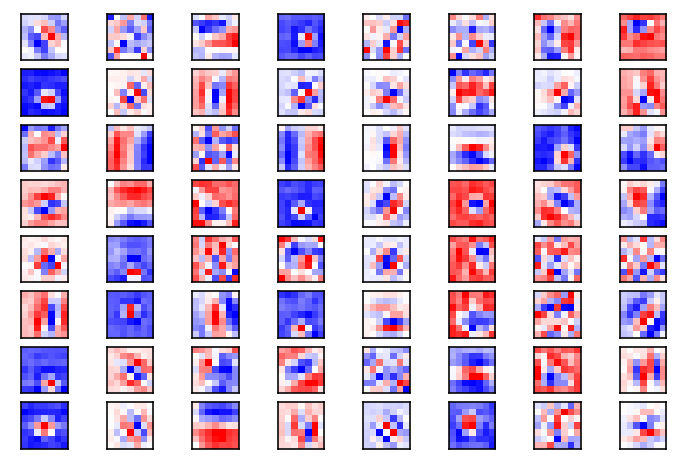

In [7]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
n_filters, ix = 64, 1
square = 8 

plt.rcParams['axes.facecolor'] = 'white'

for _ in range(square):
    for _ in range(square):
        # specify subplot and turn of axis
        ax = plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(filters[ix-1, :, :], cmap='bwr')
        ix += 1






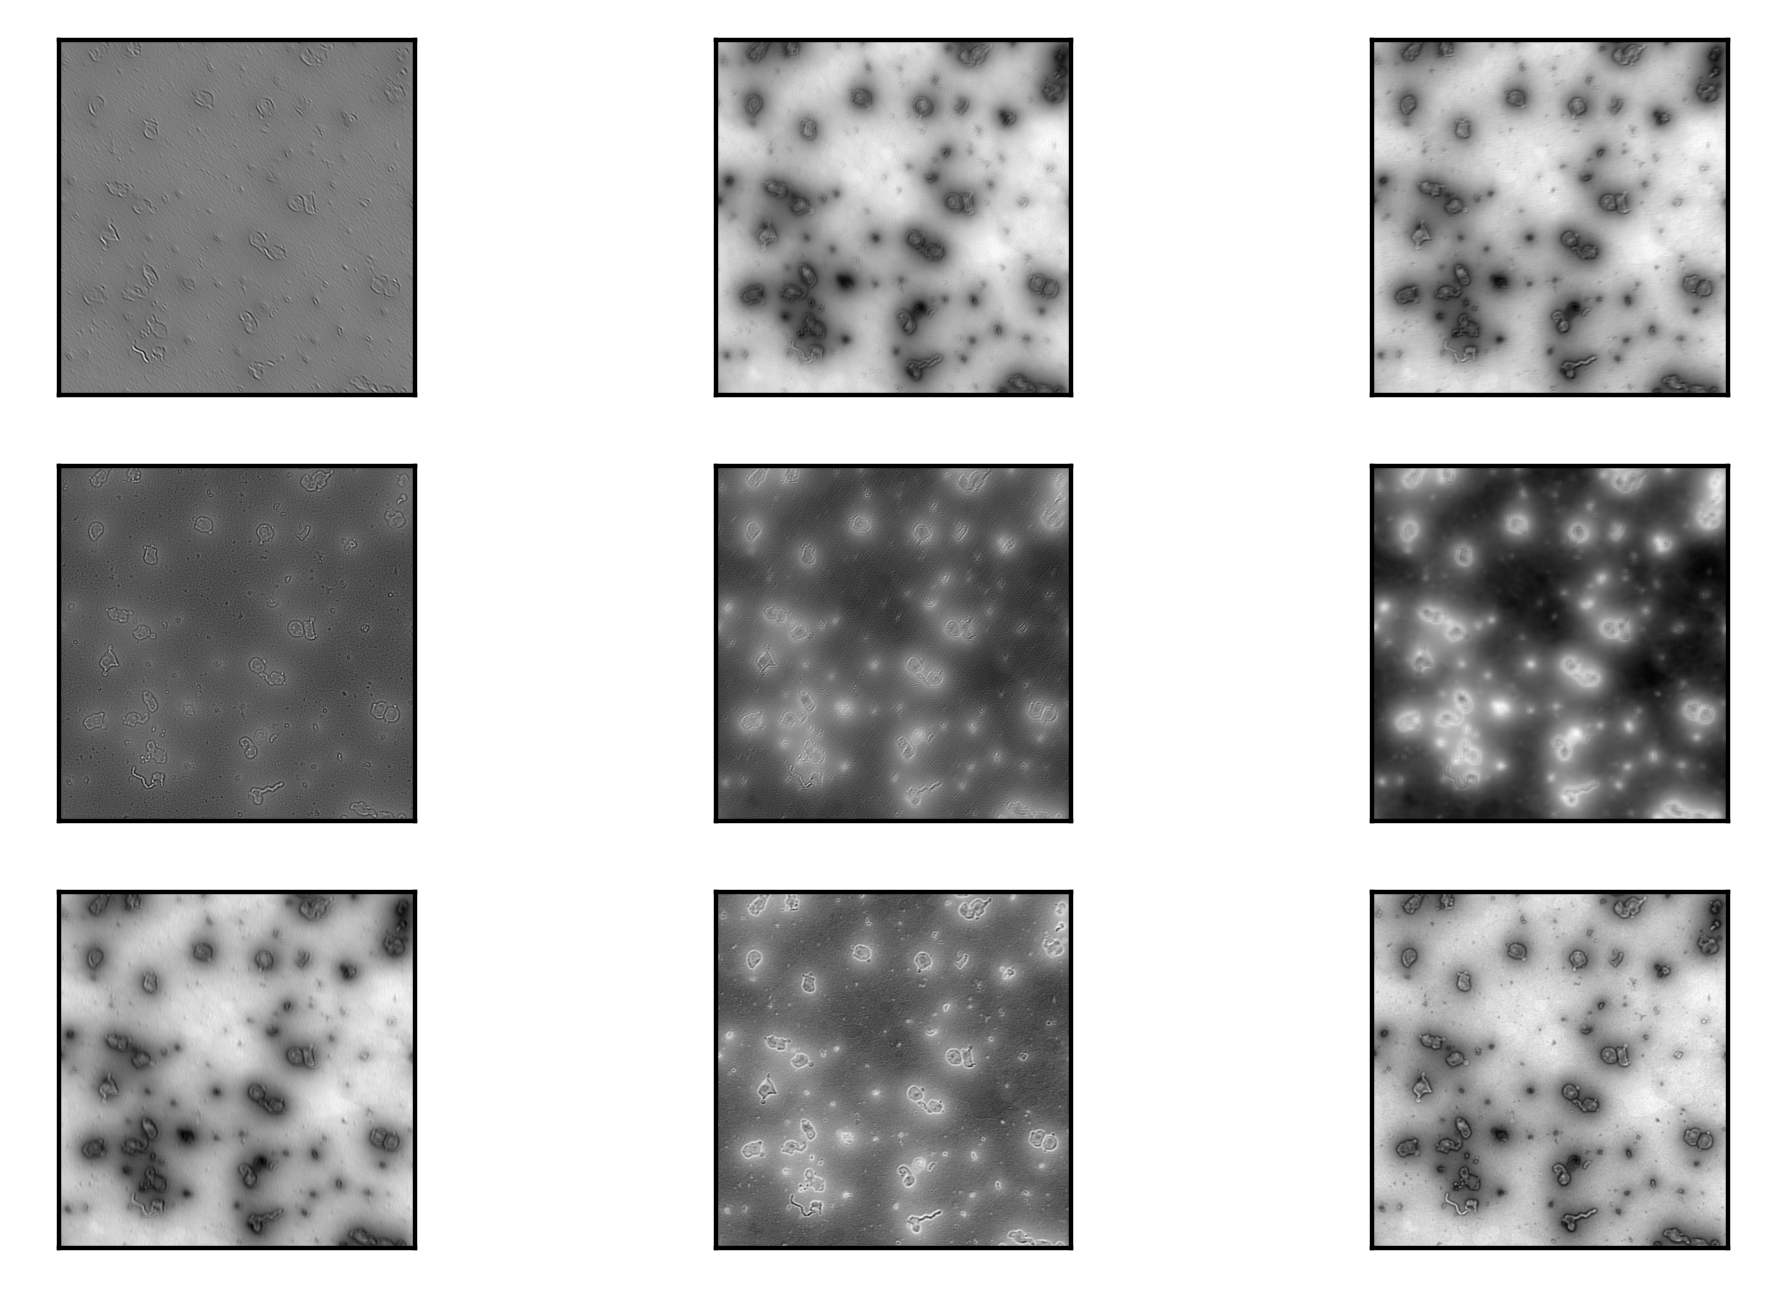

In [8]:

import matplotlib.pyplot as plt

import cv2 as cv
import numpy as np

plt.rcParams['figure.dpi'] =200


filters_flat = np.load('./filters_flat.npy', allow_pickle=True).item()

kernel = np.array(filters_flat['res50'])
# print(kernel)
img = cv.imread('./data/MuLV/gray/0907C0D9_0015.png')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img = img/255

img = cv.resize(img,(512,512),interpolation=cv.INTER_LINEAR)
# plt.imshow(img)

square =3
idx = 0

# ff = np.zeros((512,512))
# for i in range(64):
#     ff += cv.filter2D(img, -1, np.squeeze(kernel[i,:,:])) 
# fff = ff/64

# plt.tight_layout
# plt.imshow(fff,  cmap='gray')

for _ in range(square):
    for _ in range(square):
        # specify subplot and turn of axis
        ax = plt.subplot(square, square,idx+1)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        ffr = cv.filter2D(img, -1, np.squeeze(kernel[idx,:,:]))

        plt.imshow(ffr, cmap='gray')
        idx += 1

# plt.savefig('femap.pdf',dpi=1000,bbox_inches='tight',pad_inches=0.0)

